                TF-IDF (Term Frequency-Inverse Document Frequency)

-> O TF-IDF é uma métrica estatistica que tem como objetivo avaliar a importância 
de uma palavra em um documento em relação a uma coleção completa de documentos (corpus).

                        TF-IDF: A Evolução do Bag-Of-Words
-> A principal fraqueza do Bag-of-Words  é que ele trata todas as palavras
com base apenas na sua frequência local (contagem no documento). Palavras
muito comuns, como "o", "a", "de", "e" (as chamadas stop words), recebem
as maiores contagens, mas não carregam muito significado.


                        Term Frequency (Frequência do Termo)
-> o que é: A frequência com que uma palavra t aparece em um documento d.

-> Objetivo: Medir a importância da palavra DENTRO daquele documento.

-> Fórmula Simples: TF(t,d) = numero de ocorrências de t em d / numero total 
de palavras em d.


        IDF: Inverse Document Frequency (Frequência Inversa do Documento)

-> O que é: Uma medida de quão rara a palavra t é em todo o conjunto de 
documentos (corpus).

-> Objetivo: Reduzir o peso de palavras que são muito comuns em todos os 
documentos e dar mais peso a palavras que são exclusivas ou raras.

-> Lógica: Se uma palavra aparece em quase todos os documentos (ex:
"o"), seu valor IDF será baixo (próximo do zero). Se uma palavra
aparece em poucos documentos (ex: "petroleiro", "conspiração"), 
seu valor IDF será alto.

                            O Score TF-IDF Final
-> O valor TF-IDF é o produto dessas duas partes:

            TF-IDF(t,d) = TF(t,d) x IDF(t)

                            Conclusão
-> O TF-IDF faz com que as palavras com alta frequência
no documento e baixa frequência no corpus total recebam os
maiores pesos.

                    Import das Biblioteca Pandas

In [ ]:
import pandas as pd

                        Acessando a Base de Dados

In [2]:
base_de_dados = pd.read_csv("Dados/WELFake_Dataset.csv")

                Visualizando as 5 primeiras linhas do dataset

In [3]:
base_de_dados.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


                        Removendo a primeira coluna 

In [4]:
# Como não precisaremos da coluna "Unnamed", vamos elimina-la com o objetivo
# de tornar a análise mais precisa

# drop: Função do pandas que tem como objetivo eliminar colunas ou linhas
# do dataset. A função recebe como argumento:

# base_de_dados.columns[0]: Atributo que contém o nome das colunas de
# um dataset. Vamos acessar o indice 0 que fará referência a primeira
# coluna (coluna que queremos eliminar).

# Observação: A base_de_dados possui atributos por que a função read_csv
# retorna um objeto pandas

# axis = 1: Indica que queremos eliminar uma coluna
base_de_dados = base_de_dados.drop(base_de_dados.columns[0], axis= 1)

                        Verificando se a coluna foi excluida    

In [5]:
base_de_dados.columns

Index(['title', 'text', 'label'], dtype='object')

                    Verificando a Dimensão da Base de Dados

In [6]:
base_de_dados.shape

(72134, 3)

-> Podemos observar que agora a base de dados possui 72.134 linhas e 3 colunas 

            Verificando a Quantidade de Valores Nulos

In [7]:
base_de_dados.isnull().sum()

title    558
text      39
label      0
dtype: int64

       Removendo os Valores Nulos da Base de Dados

In [8]:
base_de_dados = base_de_dados.dropna()

        Verificando se os valores nulos foram excluidos

In [9]:
base_de_dados.isnull().sum()

title    0
text     0
label    0
dtype: int64

        Verificando a Quantidade de Linhas Após a Exclusão dos Valores Nulos

In [ ]:
# Vamos acessar apenas o primeiro valor (as linhas) do atributo shape
base_de_dados.shape[0]

71537

                            Checa e Remove Linhas

                 Verificando a Quantidade de Linhas Repetidas

In [15]:
# duplicated: Função do pandas que retorna valores booleanos False (se
# não existir valores repetidos) e True (se existir valores repetidos).

# sum: Ira somar a quantidade de valores repetidos encontrados
valores_repetidos = base_de_dados.duplicated().sum()

print("Quantidade de valores repetidos: ", valores_repetidos)

Quantidade de valores repetidos:  8416


                      Eliminado os Valores Repetidos

In [16]:
# drop_duplicates: Função do pandas que tem como objetivo eliminar 
# linhas dduplicadas
base_de_dados = base_de_dados.drop_duplicates()

    Verificando a Quantidade de Linhas Após a Exclusaõ de Valores Duplicados

In [17]:
base_de_dados.shape[0]

63121

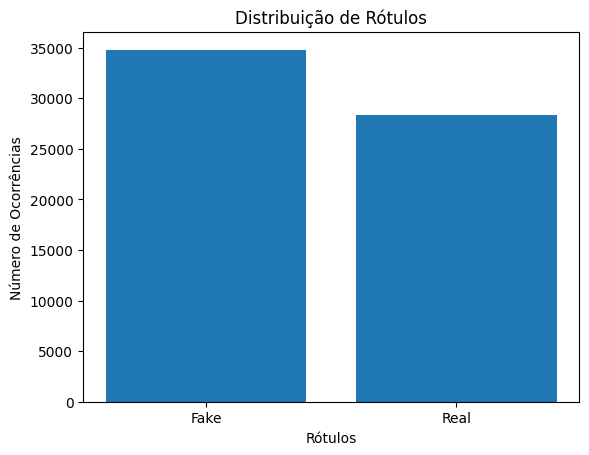

In [22]:
import matplotlib.pyplot as plt

valores_unicos = base_de_dados['label'].value_counts()

plt.bar(valores_unicos.index, valores_unicos)

plt.title("Distribuição de Rótulos")

plt.xlabel("Rótulos")

plt.ylabel("Número de Ocorrências")

plt.xticks([0, 1], ['Fake', 'Real'])

plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

